# Estación Plaza Elíptica

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_56.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,59.064516
2013-02-01,50.612903
2013-03-01,41.451613
2013-04-01,43.161290
2013-05-01,41.645161


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

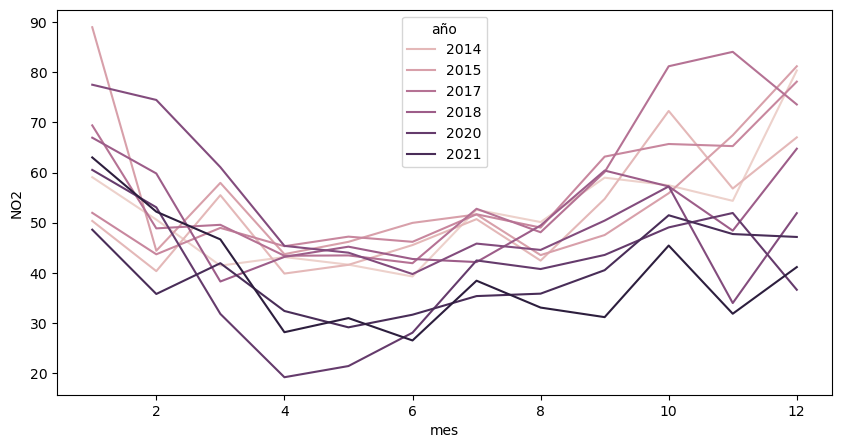

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

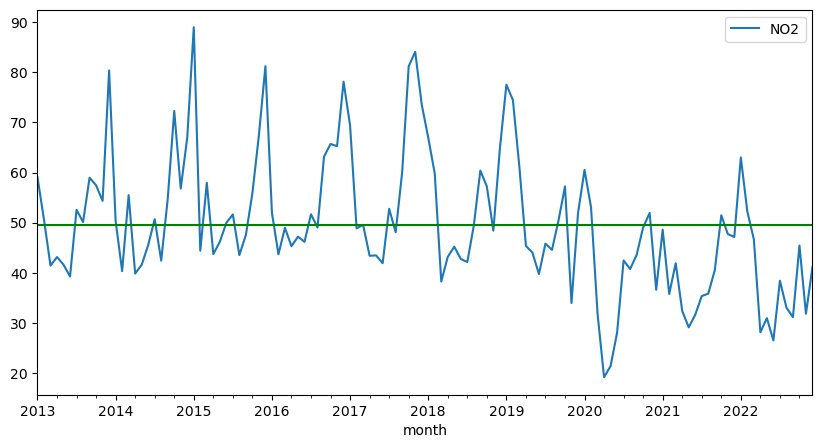

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

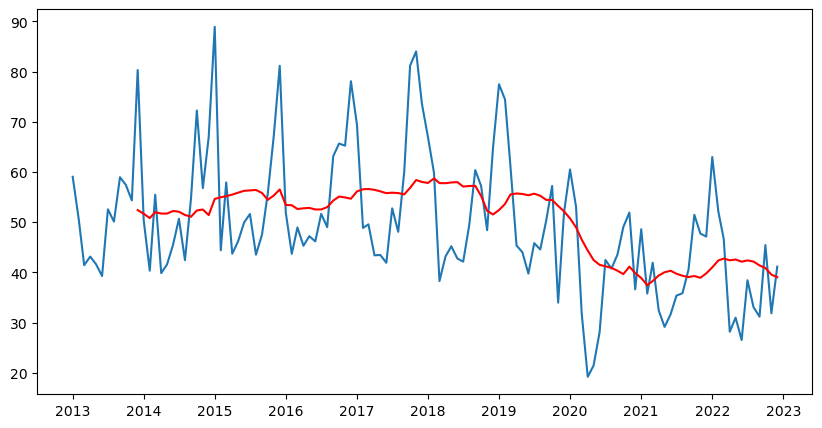

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,59.064516
2013-02-01,50.612903
2013-03-01,41.451613
2013-04-01,43.161290
2013-05-01,41.645161


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,59.064516,2013,1
2013-02-01,50.612903,2013,2
2013-03-01,41.451613,2013,3
2013-04-01,43.161290,2013,4
2013-05-01,41.645161,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,59.064516,2013,1
2013-02-01,50.612903,2013,2
2013-03-01,41.451613,2013,3
2013-04-01,43.161290,2013,4
2013-05-01,41.645161,2013,5


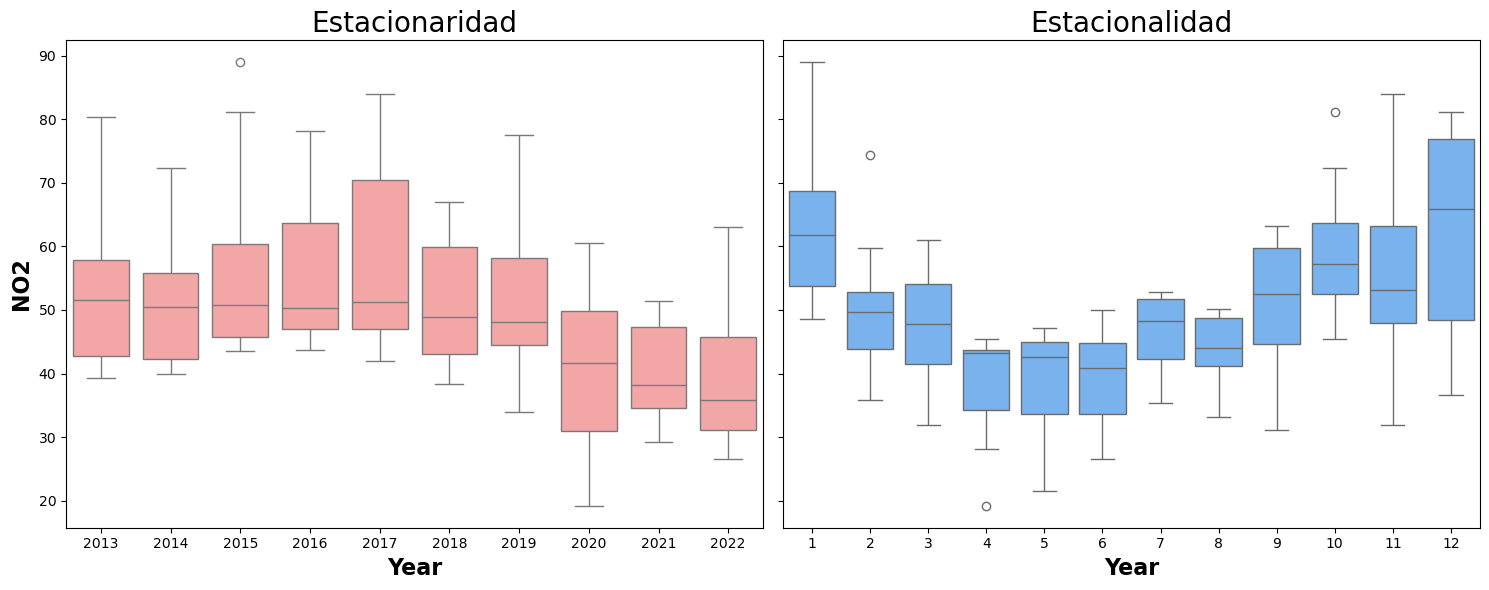

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-0.4035418695687072,
 0.909505730240808,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 788.1606338658238)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.4035418695687072
p-value 0.909505730240808
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 0.9999999999999999
1 mes Lag, 0.6322738799022872
2 mes Lag, 0.4122144964309619
3 mes Lag, 0.26185829343467926
4 mes Lag, 0.035085392158505015
5 mes Lag, -0.07215241328659763
6 mes Lag, -0.11057650735393462
7 mes Lag, -0.11375108723767387
8 mes Lag, -0.06747631111846708
9 mes Lag, 0.13039390561258532
10 mes Lag, 0.3334742535538527
11 mes Lag, 0.46889447471212387
12 mes Lag, 0.6096908788933995
13 mes Lag, 0.5527422830533214
14 mes Lag, 0.37292066066584184
15 mes Lag, 0.2249858490735744
16 mes Lag, 0.04956134571500006
17 mes Lag, -0.07137544015227819
18 mes Lag, -0.1266023468296219
19 mes Lag, -0.1895253412504078
20 mes Lag, -0.08751054058068243
21 mes Lag, 0.059562860366228966
22 mes Lag, 0.16797800194580112
23 mes Lag, 0.38540582906587517
24 mes Lag, 0.5368842298644212
25 mes Lag, 0.4173415098940505
26 mes Lag, 0.29953520523333355
27 mes Lag, 0.1135933909179546
28 mes Lag, -0.12726610644700323
29 mes Lag, -0.23916595820645223
30 mes Lag, -0.2893330881237809
31 mes Lag, -0.283

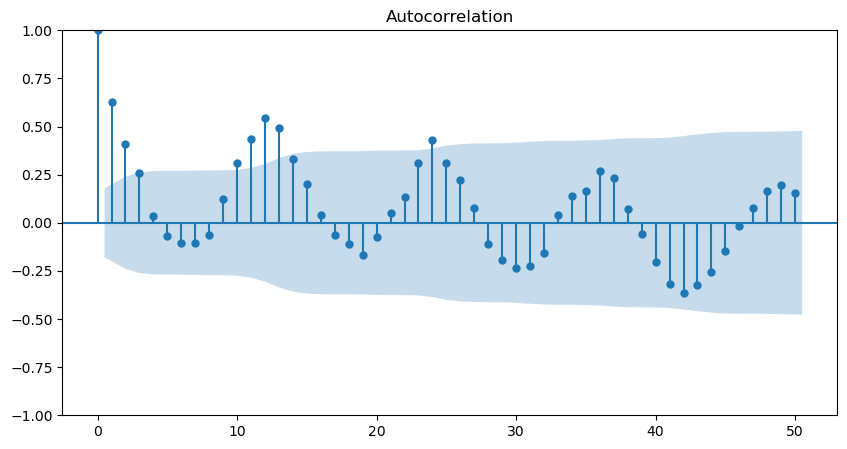

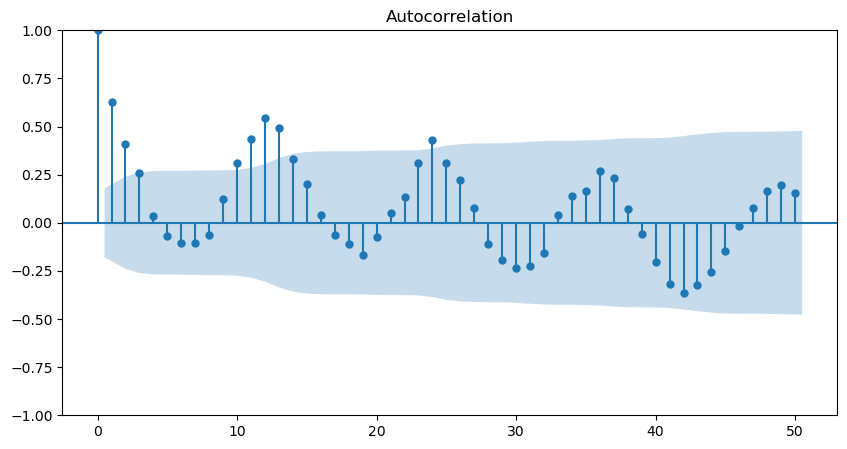

In [19]:
plot_acf(df, lags = 50)

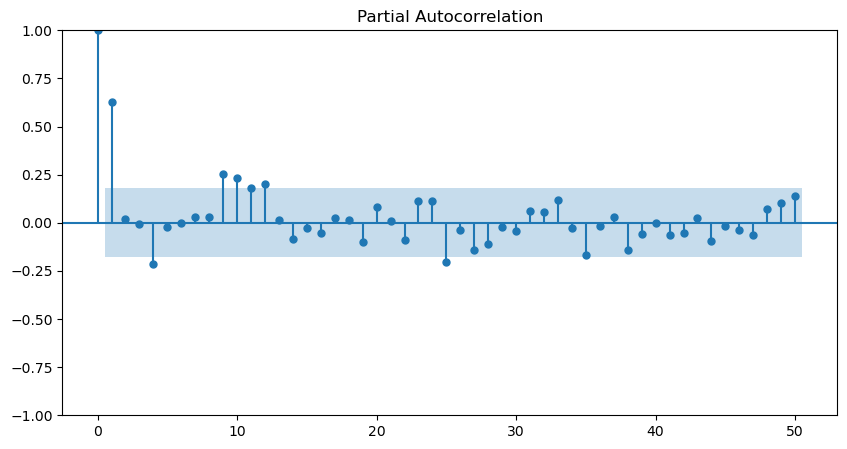

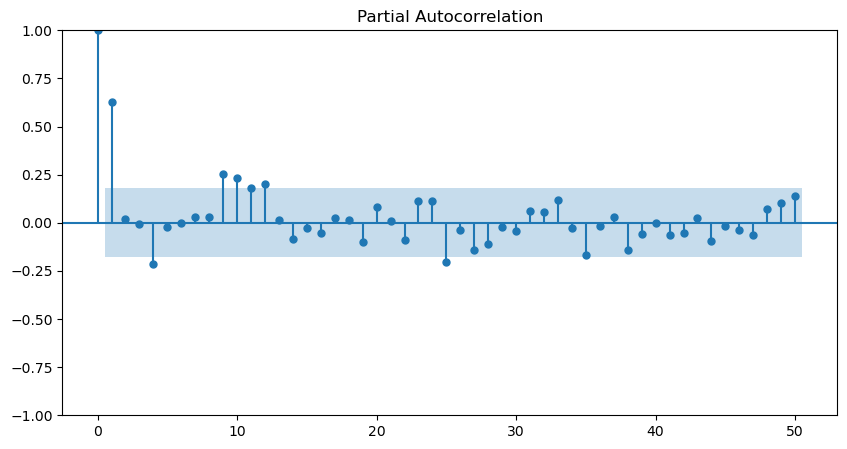

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,59.064516
2013-02-01,50.612903
2013-03-01,41.451613
2013-04-01,43.161290
2013-05-01,41.645161


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

 62%|██████▎   | 15/24 [00:00<00:00, 28.53it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 688 ms
Wall time: 1.09 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
2,9.898284,"(0, 1, 2)"
15,13.068789,"(2, 2, 0)"
20,14.301885,"(3, 1, 2)"
7,14.342440,"(1, 1, 1)"
14,14.433999,"(2, 1, 2)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(0, 1, 2),  # modelo arima
               seasonal_order=(0, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  11.556957265922621
CPU times: total: 78.1 ms
Wall time: 146 ms


,real,pred,error
2020-07-01,42.483871,41.800726,-0.683145
2020-08-01,40.774194,44.408887,3.634694
2020-09-01,43.580645,55.520397,11.939752
2020-10-01,49.064516,62.836706,13.772190
2020-11-01,51.935484,55.294499,3.359015
2020-12-01,36.645161,66.830443,30.185281
2021-01-01,48.612903,67.260403,18.647500
2021-02-01,35.806452,57.150457,21.344005
2021-03-01,41.935484,46.429975,4.494491
2021-04-01,32.419355,37.814025,5.394670


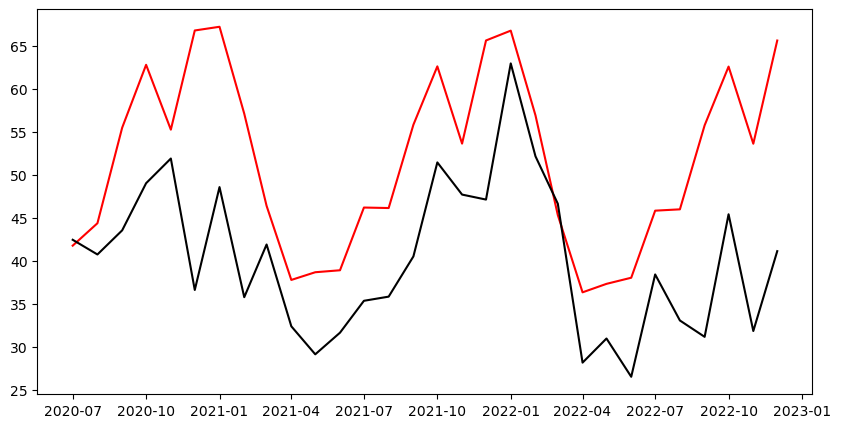

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,66.808630
2023-02-01,56.953827
2023-03-01,45.354239
2023-04-01,36.371376
2023-05-01,37.357263
2023-06-01,38.070325
2023-07-01,45.870688
2023-08-01,46.025073
2023-09-01,55.801159
2023-10-01,62.629072


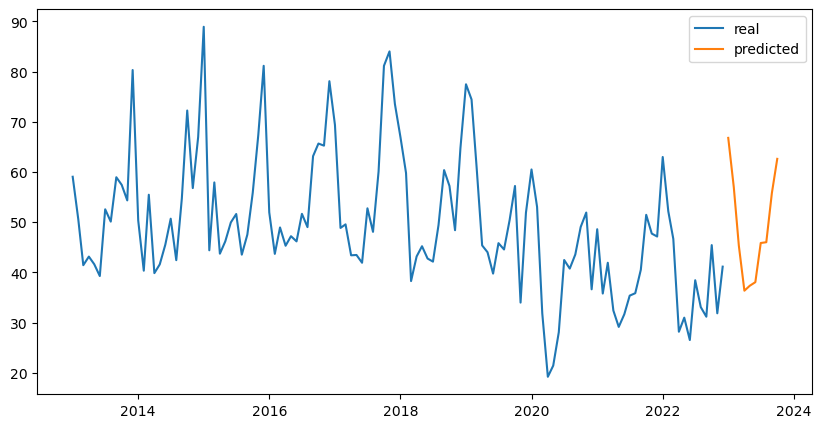

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,66.808630
2023-02-01,56.953827
2023-03-01,45.354239
2023-04-01,36.371376
2023-05-01,37.357263
2023-06-01,38.070325
2023-07-01,45.870688
2023-08-01,46.025073
2023-09-01,55.801159
2023-10-01,62.629072


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
real = df23[df23["ESTACION"] == 56]
real

,Unnamed: 0,ESTACION,ANO,MES,NO2
188,188,56,2023,1,43.322581
189,189,56,2023,2,45.903226
190,190,56,2023,3,31.741935
191,191,56,2023,4,28.838710
192,192,56,2023,5,28.516129
193,193,56,2023,6,34.741935
194,194,56,2023,7,31.322581
195,195,56,2023,8,27.032258
196,196,56,2023,9,38.193548
197,197,56,2023,10,38.645161


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(real)

,Unnamed: 0,NO2
month,,
2023-01-01,188,43.322581
2023-02-01,189,45.903226
2023-03-01,190,31.741935
2023-04-01,191,28.838710
2023-05-01,192,28.516129
2023-06-01,193,34.741935
2023-07-01,194,31.322581
2023-08-01,195,27.032258
2023-09-01,196,38.193548


In [39]:
real.drop("Unnamed: 0", axis=1, inplace=True)

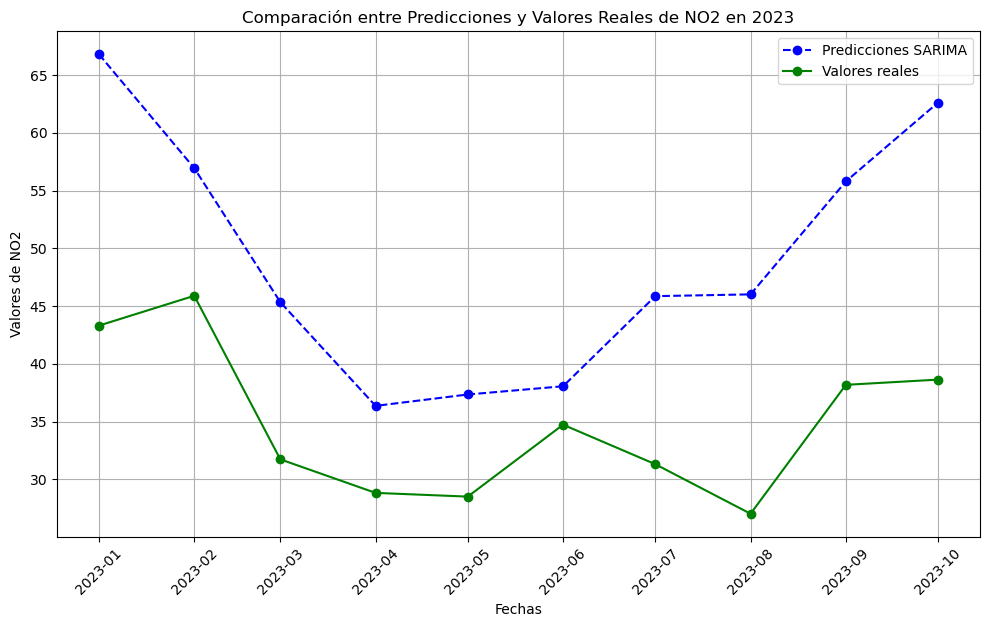

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
real.index = pd.to_datetime(real.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = real['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [41]:
pred_año["predicted_mean"]
real["NO2"]

month
2023-01-01    43.322581
2023-02-01    45.903226
2023-03-01    31.741935
2023-04-01    28.838710
2023-05-01    28.516129
2023-06-01    34.741935
2023-07-01    31.322581
2023-08-01    27.032258
2023-09-01    38.193548
2023-10-01    38.645161
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [42]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,66.808630
2023-02-01,56.953827
2023-03-01,45.354239
2023-04-01,36.371376
2023-05-01,37.357263
2023-06-01,38.070325
2023-07-01,45.870688
2023-08-01,46.025073
2023-09-01,55.801159
2023-10-01,62.629072


In [45]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de los datos reales
frames = [real, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,43.322581
2023-02-01,45.903226
2023-03-01,31.741935
2023-04-01,28.838710
2023-05-01,28.516129
2023-06-01,34.741935
2023-07-01,31.322581
2023-08-01,27.032258
2023-09-01,38.193548
2023-10-01,38.645161


In [46]:
#Corrección valores

ultimas_fechas = df_extendido.index[-2:]  # Obtener las dos últimas fechas

# Acceder a las filas correspondientes a esas fechas
ultimas_filas = df_extendido.loc[ultimas_fechas]

# Multiplicar los valores de la columna 'NO2' por 0.8 en esas filas
ultimas_filas['NO2'] *= 0.8

df_extendido.loc[ultimas_fechas] = ultimas_filas

In [47]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    36.976194
dtype: float64

In [48]:
dff = df_predict23.to_frame()
dff = dff.rename(columns={0: "Plaza Eliptica"})
dff

,Plaza Eliptica
NO2,36.976194


In [49]:
dff.to_csv('../../clean_visuals/predicts23/56_Plaza_Eliptica.csv', index=True)